* You should care about probability and statistics because it is a very powerful tool for dealing with **uncertainty**.
*  Probability Theory is a **mathematical** framework -**formalism**- for computing the probability of complex events. Under the assumption that **we know the probabilities of the basic events.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets

## Simulating coin flips

Instead of "Heads" and "Tails" we will use $x_i=1$ or $x_i=-1$ and consider the sum $S_k=x_1+x_2+\cdots+x_k$. <br>
$x_i=-1$ with probability $1/2$, $x_i=+1$ with probability $1/2$ <br>
Our experiments will show that the sum $S_k$ is (almost) always in the range $\big[-4\sqrt{k},+4\sqrt{k}\big]$ 

In [14]:
# Generate the sum of k coin flips, repeat that n times
def generate_counts(k=1000,n=100):
    X=2*(np.random.rand(k,n)>0.5)-1  # generate a kXn matrix of +-1 random numbers
    S=np.sum(X,axis=0) 
    return S 

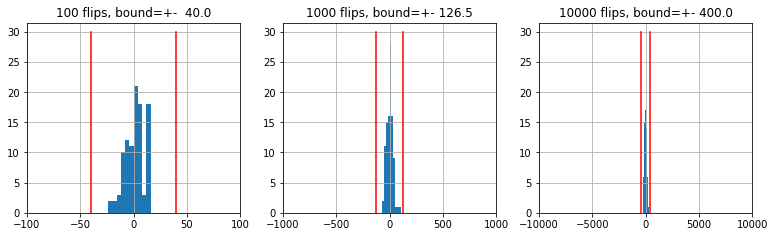

In [17]:
plt.figure(figsize=[13,3.5])
for j in range(2,5):
    k=10**j
    counts=generate_counts(k=k,n=100)
    plt.subplot(130+j-1)
    plt.hist(counts,bins=10);
    plt.xlim([-k,k])
    d=4*np.sqrt(k)
    plt.plot([-d,-d],[0,30],'r')
    plt.plot([+d,+d],[0,30],'r')
    plt.grid()
    plt.title('%d flips, bound=+-%6.1f'%(k,d))
plt.show()

* ###### Note that the sum $S_{1000}$ is not **exactly** $0$, it is only **close to** $0$.

# What is probability theory?

It is the math involved in **proving** (a precise version of) statements like: <br>
$$ \mbox{ If }\;\;k \to \infty,  \frac{S_k}{k} \to 0$$ <br>

Using probability theory you can show that the probability that $$\big| S_k \big| \geq 4\sqrt{k}$$
is smaller than $2 \times 10^{-8}$ which is $0.000002\%$ <br>

In most cases, we can **approximate** probabilities using simulations (Monte-Carlo simulations).

# What is statistics?
Probability theory computes probabilities of complex events given the underlying base probabilities. Statistics takes us in the opposite direction. We are given **data** that was generated by a **Stochastic process**. We **infer** properties of the underlying base probabilities. Unlike probability -which is part of math- Statistics is about analyzing real-world data and drawing conclusions.


# Example:  deciding whether a coin is biased.

we discussed the distribution of the number of heads when flipping a fair coin many times. Let's turn the question around: we flip a coin 1000 times and get 570 heads. Can we conclude that the coin is biased (not fair) ? What can we conclude if we got 507 heads? <br>

### The Logic of Statistical inference
The answer uses the following logic.

* Suppose that the coin is fair. 
* Use **probability theory** to compute the probability of getting at least 570 (or 507) heads.
* If this probability is very small, then we can **reject** <font color='red'>with confidence</font> the hypothesis that the coin is fair.

If number of heads is $570$ then $S_{1000} = 570-430 = 140$  
It is very unlikely that the coin is unbiased since $|S_{1000}| > 4\sqrt{k} \approx 126.5$

If the number is 507 heads = 493 tails $ \Rightarrow S_n = 14$,       $\;\;\;14 \ll 126.5$ <br>
We cannot conclude that coin is biased.

# Conclusion
The probability that an unbiased coin would generate a sequence with 570 or more heads is extremely small. From which we can conclude, <font color='red'>with high confidence</font>, that the coin **is** biased. <br>
On the other hand, $\big| S_{1000} \big | \geq 507$ is quite likely. So getting 507 heads does not provide evidence that the coin is biased.

### The three card puzzle

Suppose we have three cards in a hat:
* <span style="color:red">**R**</span><span style="color:blue">**B**</span> - One card is painted <span style="color:blue">blue</span> on one side and <span style="color:red">red</span> on the other.

* <span style="color:blue">**BB**</span> - One card is painted <span style="color:blue">blue</span> on both sides.
* <span style="color:red">**RR**</span> - One card is painted <span style="color:red">red</span> on both sides. <br>


* I pick one of the three cards at random, flip it to a random side, and place it on the table.
* $U$ be the color of the side of the card facing up. (<span style="color:blue">**B**</span> or <span style="color:red">**R**</span>)


## Do you want to bet?
  * If the other side of the card has a different I pay you \$1, 
  * If the other side has the same color you pay me \$1.

## Why is this a fair bet ?
* Suppose $U$ is <span style="color:red">**R**</span>. 
* Then the card is either <span style="color:red">**RR**</span> or <span style="color:red">**R**</span><span style="color:blue">**B**</span>.
* Therefor the other side can be either  <span style="color:red">**R**</span> or <span style="color:blue">**B**</span>
* Therefor in this case the odds are equal.
* A similar argument holds for the case where $U$ is <span style="color:blue">**B**</span>

## Lets use a monte-carlo simulation
The code below selects one of the three cards at random and selects a random side to be "up".

It then prints the card and indicates if the two sides have the same or different colors.

In [54]:
from termcolor import colored


Cards=[(colored('R', on_color='on_red'),colored('B', on_color='on_blue')),(colored('R', on_color='on_red'), \
        colored('R', on_color ='on_red')),(colored('B', on_color='on_blue'),colored('B', on_color='on_blue'))]

counts={'same':0,'different':0}

for j in range(50):
    i=np.random.randint(3)  # Select a random card
    C=Cards[i]
    side=np.random.randint(2) # flip the card
    
    same= 'same' if C[0]==C[1] else 'different'  # count the number of times the two sides are the same or different.
    counts[same]+=1
    
    if(side==1):        # select which side to be "up" for visualization purposes
        C=(C[1],C[0])
        
    print(''.join(C)+' %-11s'%same, end='')
    
    if (j+1)%5==0:
        print()

        
print()
print(counts)

BB same       BB same       BB same       RR same       BR different  
RB different  RR same       RR same       RR same       RR same       
RR same       RR same       RR same       BB same       RB different  
RB different  BB same       BR different  BB same       BB same       
BB same       BR different  RB different  BR different  RR same       
RR same       BB same       RB different  RR same       BB same       
RR same       RR same       RB different  BR different  BB same       
BB same       RR same       BR different  RR same       BR different  
RR same       BR different  BR different  RR same       RB different  
RB different  RR same       RR same       RR same       BB same       

{'same': 33, 'different': 17}


## The simulation does not agree with the argument
 * In Simulation: the two sides have the same color about **twice** the number of times that they have different color.
 * you are twice as likely to lose as you are to win.
 * On average you lose 33 cents per iteration:  
$\$1\times(2/3)-\$1\times(1/3)$

## Alternative argument
If we pick a card at random 2/3 of the time we pick a card where the two sides have the same color, and only 1/3 where the color is different. <br>

To be sure of your argument, you need more formalism. that's what probability theory provides.

## A short History: Games of chance VS Strength of evidence & degrees of belief

* **The frequentist point of view** : to assign probabilities to the outcomes of a game/experiment is the same as saying if we repeat the game many many times, the long term frequencies of the outcomes converge to the probabilities. <br>

* **Combining Evidence**: Requires combining pieces of information, Most information is uncertain, Different pieces of information have different relevence [Ex: Diagnosing a patient], A popular approcach is Bayesian Statistics.

In [77]:
## Long-term-frequencies Simulation

from termcolor import colored
#Create list of color symbols
sym = [colored('6', on_color='on_red'), colored('1', on_color='on_green'), \
       colored('3', on_color='on_yellow'), colored('4', on_color='on_blue')]

c = [ 0. ,  0.1,  0.3,  0.6,  1. ]

def rand2sym(X):
    """ Transform an array of random numbers, distributed uniformly in [0,1]
    into a sequence of symbols, chosen according to the probabilities defined by c (cumul of p)"""
    sym_plot = []
    counts = { i : 0 for i in range(4)}
    for n in X: 
        for j in range(4):
            if c[j] <= n <= c[j+1]:
                sym_plot.append(sym[j])
                counts[j] += 1
                break
    return sym_plot, counts
                

n=1000
X = np.random.uniform(size = n)
syms, counts = rand2sym(X)

f = [ float(i)/n for i in list(counts.values())]

print(''.join(syms))
print()
for i in range(4):
    print('The frequency of %s is %3.2f'%(sym[i],f[i]))

4113314333434434333444134411344144133366441344334333643116443344446464444431336414141634464313164443416663164344414111341313641141141311664444436446441434434611131313343144144464344434431146146413444134344441414444343333144644343314434433441333444336343136414344364446133341333134434344141444134134144143363411364334441663314116444344433113633433434433443644343631133663411343143344341344344134413333334441141413164331646344413444614431143434444333341443333343344334131313416443433434343334443143441313143314341633364113343344641136444164344134644431641164631116331144331144313464144144113463633431643133134413446431414114334431446434446333413443141166316434663141443344334344443116334134634313444413413141414333141334363341114414161433443433334334143636346133431431341343346131331464341433444346634316334431444111131343331144464311134146413431436443411144341331363141344434431411141134114643114444613343341146331444446344444441434444334436431163446441443333314434413343444461146333341461344144444431

# Linear Regression

## Small example
Suppose we have 9 points on the plane, defined by their $(x,y)$ coordinates

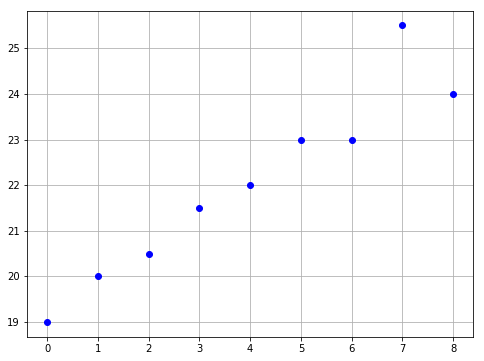

In [38]:
plt.figure(figsize=[8,6])
x = np.arange(0,9)
y = np.array([[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]]).T
plt.plot(x,y,'bo');
plt.grid()
plt.show()

* These points are close to a straight line trending upwards. We would like to find that line. 
* The line is described by a function of the form: $f_{w_0,w_1}(x) \doteq w_0+w_1 x$
* our goal is to find $w_0$ and $w_1$.
* As here we have more than two points the system is **overconstrained** - there is no straight line that passes through all of the points.
* The points do not fall **exactly** on a line.  
So we are looking for $w_0,w_1$  
such that the line is **closest** to the points.


We define the **Square difference** between the line $f_{w_0,w_1}$ and the points
$\langle (x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n) \rangle$ to be 
$$\sum_{i=1}^n [f_{w_0,w_1}(x_i)-y_i]^2$$
(In our example $n=9$)


The values of $w_0,w_1$ which  
minimize the square difference,  
are called the **least squares** solution.

We use matrix notation and `numpy.linalg` to find the optimal vector ${\bf w}=[w_0,w_1]$

${\bf A}$ is an $n$ by $2$ matrix:
$${\bf A} =  \begin{pmatrix}
 1, x_1\\
 \vdots\\
 1, x_n
 \end{pmatrix} 
$$

 ${\bf y}$ and ${\bf w}$ are column vectors:
 $${\bf y} =  \begin{pmatrix}
 y_1\\
 \vdots\\
 y_n
 \end{pmatrix} 
 ,\;\;\;\;
 {\bf w} = \begin{pmatrix}
 w_0\\
 w_1
 \end{pmatrix}
$$

We can then express the differences as a vector ${\bf d}$:
$$ {\bf d} = {\bf A} {\bf w} - {\bf y} $$

The square difference, that we wish to minimize, is equal to the square of the norm of ${\bf d}$. 

Our goal is to find ${\bf w}$ that minimizes  
$\|{\bf d}\|_2^2 = \sum_{i=1}^n d_i^2$

In [39]:
A = np.array([ np.ones(9),x ]).T
# linearly generated sequence
w = np.linalg.lstsq(A,y)[0] # obtaining the parameters

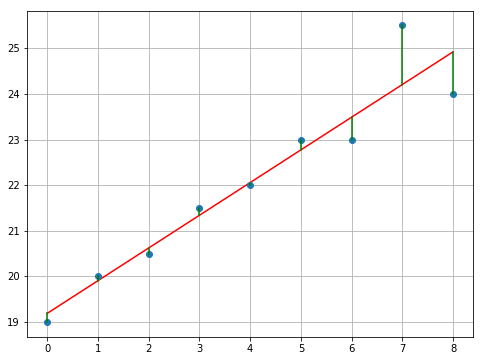

In [42]:
# plotting the line and the square differences
plt.figure(figsize=[8,6])
line = w[0]+w[1]*x # regression line
plt.plot(x,line,'r-',x,y,'o')

for i in range(len(x)):
    plt.plot([x[i],x[i]],[y[i],w[1]*x[i]+w[0]],'g')

plt.grid()
plt.show()

## A real-life example
We now turn our attention to the analysis of some real-word data. This data describes  the weight and height of some 25,000 people.

# Polynomial Regression

# Regression to the mean

Suppose you have a pair of IID random variables $X_1,X_2$. If you select pairs $x_1,x_2$ such that $x_1$ is far from the mean of the distribution, then $x_2$ for those pairs will tend to be closer to the mean. 

# Principle components analysis

* PCA and regression are modeling methods based on minimizing RMS error 
* Regression is a supervised method- you have to choose what to predict
* PCA is an unsupervised method
* Both methods are based on linear algebra and are therefor very efficient.

In [15]:
%pylab inline
from scipy import *
from numpy.linalg import norm
from math import sqrt,sin,cos
import pandas as pd
import numpy as np
from numpy import arange,array,ones,linalg

Populating the interactive namespace from numpy and matplotlib


NameError: name 'data' is not defined

## Linear Algebra

### Arrays as Vectors
One way to define vectors in numpy is to use a one dimensional array. <BR>
* The array `np.array([1,2,3,4])` **defines a vector** in $R^4$, i.e. a vector of dimension $4$ 
* The array `np.array([[1,2],[3,4]])` which is a rectangle of numbers, also called a **Matrix**

In [80]:
v1= np.array([1,2,3,4])
M = np.array([[1,2],[3,4]])

### Visualizing 2D vectors

In [4]:
import matplotlib.pyplot as plt
from numpy.linalg import norm
text_loc=1.1
def plot_arrows(L,scale=4,text_loc=0.2,fontsize=12):
    """ Plot a list of arrows. Each arrow defined by start and end points and a color and optionally text"""
    plt.figure(figsize=[6,6])
    plt.xlim([-scale,scale])
    plt.ylim([-scale,scale])
    ax = plt.axes()
    plt.xlabel('1st coord (x)')
    plt.ylabel('2nd coord (y)')
    #ax.axis('equal')

    for A in L:
        s,e,c=A[:3]
        ax.arrow(s[0], s[1], e[0], e[1], head_width=0.05*scale, head_length=0.1*scale, fc=c, ec=c,length_includes_head=True);
        if len(A)==4:
            t=A[3]
            _loc=1+text_loc/norm(e)
            ax.text(_loc*e[0],_loc*e[1],t,fontsize=fontsize)
    plt.grid()
    plt.show()

C:\Users\staff\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


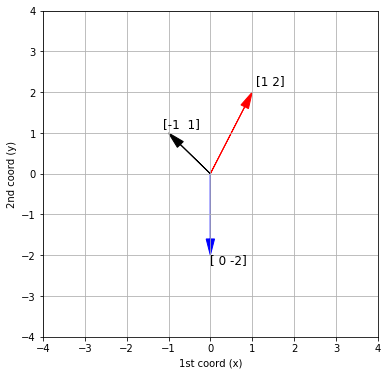

In [5]:
zero=np.array([0,0])
v1=np.array([1,2])
v2=np.array([-1,1])
v3=np.array([0,-2])
plot_arrows([[zero,v1,'r',str(v1)],[zero,v2,'k',str(v2)],[zero,v3,'b',str(v3)]])


In [110]:
## dot product
v1=np.array([1,2])
v2=np.array([-1,1])
dot_product = np.dot(v1,v2)
print(dot_product)

##  The norm of a vector
norm = np.sqrt(np.dot(v1,v1))
print(norm)

## Unit vectors
from numpy.linalg import norm
u1=v1/norm(v1)
print(u1)
print(norm(u1))


1
2.2360679775
[ 0.4472136   0.89442719]
1.0


### Projections
Taking the dot product of an arbitrary vector `v2` with a unit vector `u1` has a simple geometric interpretation

C:\Users\hamdymostafa\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


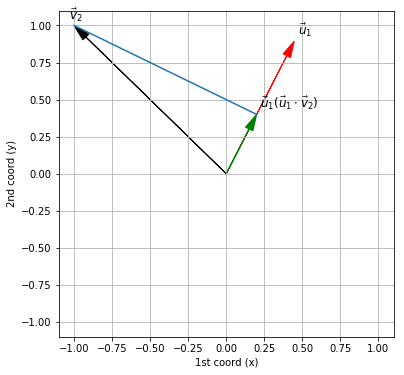

In [115]:
p=u1*np.dot(u1,v2)
ax=plot_arrows([[zero,u1,'r','$\\vec{u}_1$'],[zero,v2,'k','$\\vec{v}_2$'],\
                [zero,p,'g',"$\\vec{u}_1(\\vec{u}_1\\cdot \\vec{v}_2)$"]],\
               scale=1.1,text_loc=0.05)
ax.plot([v2[0],p[0]],[v2[1],p[1]])
plt.show()

### Orthogonal vectors
Two vectors are orthogonal if their dot product is zero.

Equivalently, two vectors are orthogonal if the angle between them is 90 degrees.

black vector= [2 2] red_vector= [-1  1]
np.dot(a,b)= 0


C:\Users\hamdymostafa\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


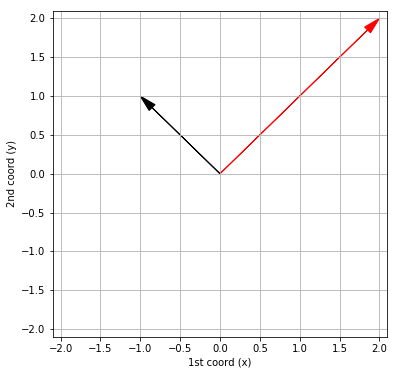

In [119]:
a=np.array([2,2])
b=np.array([-1,1])
print('black vector=',a,'red_vector=',b)
print ('np.dot(a,b)=',np.dot(a,b))
plot_arrows([[zero,a,'r'],[zero,b,'k']],scale=2.1);
plt.show()

## Orthonormal basis
We say that the vectors $\vec{u}_1,\vec{u}_2,\ldots,\vec{u}_d \in R^d$ form an **orthonormal basis** of $R^d$. If: <br>
    **Normality:** $\vec{u}_1,\vec{u}_2,\ldots,\vec{u}_d$ are unit vectors:  
$\forall 1 \leq i \leq d: \vec{u}_i \cdot \vec{u}_i =1 $  <br>

**Orthogonality:** Every pair of vectors are orthogonal:  
$\forall 1 \leq i\neq j \leq d: \vec{u}_i \cdot \vec{u}_j =0 $ <br>

### The Standard basis
The standard basis is: $\vec{e}_1 = [1,0,0,\ldots,0], \vec{e}_2 = [0,1,0,\ldots,0],$   

$\ldots,\vec{e}_d = [0,0,0,\ldots,1]$ <br>

The dot product of a vector $\vec{v}$  
with a standard basis vector $\vec{e}_i$  
is equal to the $i$th coordinate of $\vec{v}$,  
which we denote by $v_i$

In [122]:
v=np.array([5,6,3,4])
e2=np.array([0,1,0,0])
np.dot(v,e2)

6

### Reconstruction using an orthonormal basis
Orthonormal basis define a *coordinate system* and allow us to move between coordinate systems.

An orthonormal basis $\vec{u}_1,\ldots,\vec{u}_d$ can be used to represent any vector $\vec{v}$ in the following way. <br>

$\vec{v}$ is **represented** as a list of $d$ dot products: $$[\vec{v}\cdot\vec{u_1},\vec{v}\cdot\vec{u_2},\ldots,\vec{v}\cdot\vec{u_d}]$$ <br>

$\vec{v}$ is **reconstructed** by summing its projections on the basis vectors:
$$\vec{v} = (\vec{v}\cdot\vec{u_1})\vec{u_1} + \cdots + (\vec{v}\cdot\vec{u_d})\vec{u_d}$$ <br>

* Representing a vector $\vec{v}$ using the **standard** basis is yields the representation $[v_1,v_2,\ldots,v_d]$ <br>
* Representing $\vec{v}$ using an orthonormal basis is called a **change of basis**



### Visualizing change of basis

C:\Users\hamdymostafa\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


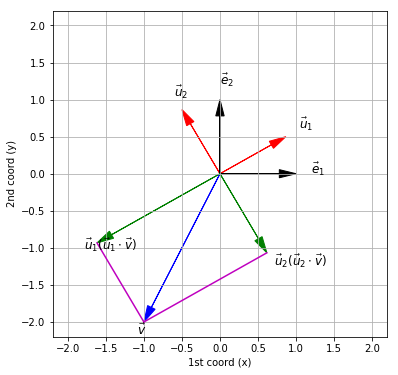

We are changing the basis representing the vector v
from the standard basis (e1,e2) to a new orthonormal basis (u1,u2)
The green arrows are the projections of v onto the directions defined by u1 and u2


In [123]:
from math import sin,cos
v=np.array([-1,-2])
e1=np.array([1,0])
e2=np.array([0,1])
angle=np.pi/6.0 # 30 degrees
u1=np.array([cos(angle),sin(angle)])
u2=np.array([-sin(angle),cos(angle)])
v,e1,e2,u1,u2
p1=u1*np.dot(u1,v)
p2=u2*np.dot(u2,v)
ax=plot_arrows([[zero,u1,'r','$\\vec{u}_1$'],[zero,u2,'r','$\\vec{u}_2$'],
               [zero,e1,'k','$\\vec{e}_1$'],[zero,e2,'k','$\\vec{e}_2$'],\
               [zero,v,'b','$\\vec{v}$'],\
               [zero,p1,'g',"$\\vec{u}_1(\\vec{u}_1\\cdot \\vec{v})$"],\
               [zero,p2,'g',"$\\vec{u}_2(\\vec{u}_2\\cdot \\vec{v})$"]],\
               scale=2.2,text_loc=0.2)
ax.plot([v[0],p1[0]],[v[1],p1[1]],'m');
ax.plot([v[0],p2[0]],[v[1],p2[1]],'m');
plt.show()
print("""We are changing the basis representing the vector v
from the standard basis (e1,e2) to a new orthonormal basis (u1,u2)
The green arrows are the projections of v onto the directions defined by u1 and u2""")

## Matrices

### Vectors as matrices.
When using matrix notation, vectors can be represented as either [row or column vectors](https://en.wikipedia.org/wiki/Row_and_column_vectors). In a matrix context, a vector $\vec{v}$ is denoted by a bold-face letter. ${\bf v}$ for a column vector and ${\bf v}^\top$ for row vector:

* By default a vector is represented as a **column vector** which is a matrix consisting of a single column:
$$
\begin{equation}
{\bf v}=
	\begin{bmatrix}
	  v_1 \\
      v_2 \\
      \vdots \\
	  v_d
	\end{bmatrix}
\end{equation}
$$

* If $\vec{v}$ is a column vector then the **transpose** of $\vec{v}$, denoted by $\vec{v}^\top$ is a **row vector** which is a matrix consists of a single row:
$$
\begin{equation}
{\bf v}^{\top}=
	\begin{bmatrix}
	  v_1 & v_2 & \cdots & v_d
	\end{bmatrix}
\end{equation}
$$

### Matrix-Matrix products

#### The dot product of two vectors
* Recall that a vector is just a skinny matrix.
* Consider the dot product $(1,2,3) \cdot (1,1,0) = 1 \times 1 + 2 \times 1 +3 \times 0= 3$.

To multiply the matrix ${\bf A}=\begin{bmatrix}
	  a_{11} & a_{12} & a_{13}\\
	  a_{21} & a_{22} & a_{23}	
	\end{bmatrix}$
by the column vector ${\bf c}=\begin{bmatrix} c_1 \\ c_2 \\ c_3 \end{bmatrix}$   that a vector is just a skinny matrix.
* Consider the dot product $(1,2,3) \cdot (1,1,0) = 1 \times 1 + 2 \times 1 +3 \times 0= 3$.



Conventions of dot product in matrix notation:
  * The first vector is a row vector and the second vector is a column vector.
  * There is no operator ($\cdot$) between the two vectors
  
$$
   \begin{bmatrix} 1,2,3 \end{bmatrix}
   \begin{bmatrix} 1 \\ 1 \\ 0 \end{bmatrix} = 1 \times 1 + 2 \times 1 +3 \times 0= 3
$$



#### The dot product of a matrix and a vector

To multiply the matrix ${\bf A}=\begin{bmatrix}
	  a_{11} & a_{12} & a_{13}\\
	  a_{21} & a_{22} & a_{23}	
	\end{bmatrix}$
by the column vector ${\bf c}=\begin{bmatrix} c_1 \\ c_2 \\ c_3 \end{bmatrix}$  




We think of ${\bf A}$ as consisting or two row vectors:
${\bf A} = \begin{bmatrix} {\bf r}_1 \\ {\bf r}_2 \end{bmatrix}$  
where $
   {\bf r}_1=\begin{bmatrix} a_{11}, a_{12}, a_{13} \end{bmatrix},
   {\bf r}_2=\begin{bmatrix} a_{21}, a_{22}, a_{23} \end{bmatrix}, 
$

and take the dot products of ${\bf r}_1,{\bf r}_2$ with ${\bf c}$ to create a column vector of dimension 2:

${\bf A} {\bf c} = \begin{bmatrix} {\bf r}_1 {\bf c} \\ {\bf r}_2 {\bf c} \end{bmatrix}
 = \begin{bmatrix}
	  a_{11}c_1 + a_{12}c_2 + a_{13} c_3 \\
	  a_{21}c_1 + a_{22}c_2 + a_{23} c_3	
	\end{bmatrix}$
    
    
   
  #### Dot product of two matrices

Multiplying a matrix and a column vector can be generalized to multiplying two matrices.



To do so we think of 
Alternatively, consider a matrix ${\bf C}$ of size $2 \times 3$ and a matrix ${\bf A}$ of size $3 \times 2$

$$
\begin{equation}
	{\bf A}=\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} \\
	  a_{31} & a_{32} 	
	\end{bmatrix}
	,
	{\bf C} = 
	\begin{bmatrix}
		  c_{11} & c_{12} & c_{13} \\
		  c_{21} & c_{22} & c_{23} 
	\end{bmatrix}
	\end{equation}
$$ 



To compute ${\bf AC}$ we think of ${\bf A}$ as a column of row vectors:
${\bf A} =\begin{bmatrix}
	  {\bf a}_1 \\
	  {\bf a}_2 \\
	  {\bf a}_3	
	\end{bmatrix}
    $
    
and of ${\bf C}$ as a row of column vectors: ${\bf C} =\begin{bmatrix}
	  {\bf c}_1,
	  {\bf c}_2,
	  {\bf c}_3	
	\end{bmatrix}
    $
   
   
   
   ${\bf AC}$ is the matrix generated from taking the dot product of each row vector in ${\bf A}$ with each column vector in ${\bf C}$

${\bf AC}=
	\begin{bmatrix}
	  {\bf a}_1 \\
	  {\bf a}_2 \\
	  {\bf a}_3		
	\end{bmatrix}
	\begin{bmatrix}
	  {\bf c}_1,
	  {\bf c}_2,
	  {\bf c}_3
	\end{bmatrix}
= \begin{bmatrix}
    {\bf a}_1 \cdot {\bf c}_1 & {\bf a}_1 \cdot {\bf c}_2 & {\bf a}_1 \cdot {\bf c}_3 \\
    {\bf a}_2 \cdot {\bf c}_1 & {\bf a}_2 \cdot {\bf c}_2 & {\bf a}_2 \cdot {\bf c}_3 \\
    {\bf a}_3 \cdot {\bf c}_1 & {\bf a}_3 \cdot {\bf c}_2 & {\bf a}_3 \cdot {\bf c}_3
    \end{bmatrix} =
    $
    
    
    
$= \begin{bmatrix}
	  a_{11} c_{11}+a_{12} c_{21} & a_{11} c_{12}+a_{12} c_{22} & a_{11} c_{13}+a_{12} c_{23} \\
	  a_{21} c_{11}+a_{22} c_{21} & a_{21} c_{12}+a_{22} c_{22} & a_{21} c_{13}+a_{22} c_{23} \\
	  a_{31} c_{11}+a_{32} c_{21} & a_{31} c_{12}+a_{32} c_{22} & a_{31} c_{13}+a_{32} c_{23}
	\end{bmatrix}
$
    


In [130]:
# Define the matrices A and C
A = np.arange(6).reshape((3,2))
C = np.random.randn(2,2)
# We will use the numpy dot operator to perform  multiplications
print(A.dot(C))

[[ 0.3406218   1.14069153]
 [ 3.21764051  2.48228531]
 [ 6.09465921  3.82387909]]


## Orthonormal matrices and change of Basis

We say that the vectors $\vec{u}_1,\vec{u}_2,\ldots,\vec{u}_d \in R^d$ form an **orthonormal basis** of $R^d$. If:
* **Normality:** $\vec{u}_1,\vec{u}_2,\ldots,\vec{u}_d$ are unit vectors: $\forall 1 \leq i \leq d: \vec{u}_i \cdot \vec{u}_i =1 $
* **Orthogonality:** Every pair of vectors are orthogonal: 
$\forall 1 \leq i\neq j \leq d: \vec{u}_i \cdot \vec{u}_j =0 $

** Orthonormal basis can be used to rotate the vector space:**
* $\vec{v}$ is **represented** as a list of $d$ dot products: $$[\vec{v}\cdot\vec{u_1},\vec{v}\cdot\vec{u_2},\ldots,\vec{v}\cdot\vec{u_d}]$$
* $\vec{v}$ is **reconstructed** by summing its projections on the basis vectors:
$$\vec{v} = (\vec{v}\cdot\vec{u_1})\vec{u_1} + (\vec{v}\cdot\vec{u_2})\vec{u_2} + \cdots + (\vec{v}\cdot\vec{u_d})\vec{u_d}$$

### Change of Basis using matrix notation
To use matrix notation, we think of $\vec{u}_i$ as a row vector:
$$
   {\bf u}_i=\begin{bmatrix} u_{i1}, u_{i2},\ldots, u_{id} \end{bmatrix},
$$

We can combine the orthonormal vectors to create an *orthonormal matrix*

$$ {\bf U} = \begin{bmatrix} {\bf u}_1 \\ {\bf u}_2 \\ \vdots \\ {\bf u}_d \end{bmatrix}
= \begin{bmatrix} 
u_{11}, u_{12},\ldots, u_{1d} \\ 
u_{21}, u_{22},\ldots, u_{2d} \\ 
\vdots\\
u_{d1}, u_{d2},\ldots, u_{dd} 
\end{bmatrix}
$$

Orthonormality: ${\bf UU^{\top} = I}$

Using this notation, the representation of a column vector $\bf v$ in the orthonormal basis corresponsing to the rows of ${\bf U}$ is equal to 

$${\bf Uv} = \begin{bmatrix} {\bf u}_1 {\bf v} \\ {\bf u}_2 {\bf v} \\ \vdots \\ {\bf u}_d {\bf v} \end{bmatrix}$$  

And the reconstruction of $\bf v$ is equal to ${\bf U U^{\mathsf{T}} v}$

## Inverting a Matrix

**Some** square matrices ${\bf A}$ have a multiplicative inverse ${\bf A^{-1}}$  
such that ${\bf A A^{-1} = A^{-1} A =I}$

Finding the inverse of a matrix is called *inverting* the matrix.  

An $n\times n$ matrix $\bf A$ represents a linear transformation from $R^n$ to $R^n$. If the matrix is [**invertible**](https://en.wikipedia.org/wiki/Invertible_matrix) then there is another transformation ${\bf A}^{-1}$ that represents the inverse transformation, such that for any column vctor ${\bf v} \in R^n$:
$${\bf A}^{-1}{\bf A}{\bf v} = {\bf A}{\bf A}^{-1}{\bf v} = {\bf v} $$

In [127]:
I = np.eye(2)
C = np.random.randn(2,2)
C_inverse = np.linalg.inv(C)
# Checking that $C\times C^{-1} = I$:
C.dot(C_inverse)-I

array([[ 0.,  0.],
       [ 0.,  0.]])

### Singular matrices
Not all matrices have an inverse. Those that do not are called **singular**

In [129]:
C=np.array([[1,0],[1,0]])
print ("C=\n",C)
try:
    C_inverse = np.linalg.inv(C)
except: 
    print('C cannot be inverted: it is a singular matrix')

C=
 [[1 0]
 [1 0]]
C cannot be inverted: it is a singular matrix


## Solving a system of linear equations

### When can you use `numpy.linlag.solve` ?
The function `numpy.linlag.solve` can be used to solve a set of $n$ linear equations with $n$ unknowns.

You simply express the set of equation in a matrix format ${\bf Ax=b}$ and call `solve` using `x=solve(A,b)` the returned value is a vector with the solution for ${\bf x}$.

However the number of equations and the number of unknowns must be equal. 
* If the number of equations is **smaller** that the number of unknowns we say that the system is **underdetermined** or **singular**. It means that we don't have enough information to specify a unique solution. In data analysis this would rarely be the case.
* If the number of equations is **larger** than the number of unknowns we say that the system if **overdetermined**. It means that there is no solution that satisfies all of the constraints. In data analysis this is a very common occurance, and we will discuss later.

### Example
Find the solution for the following set of 3 equations:
$$
x+y-z=5 \\
z+2y=3 \\
y-x=4
$$

In [7]:
# Solution

A=np.array([[1,1,-1],[0,2,1],[-1,1,0]])
b=np.array([5,3,4])
np.linalg.solve(A,b)

array([-1.,  3., -3.])

Which means that the solution is $x=-1,y=3,z=-3$

Check that the solution is correct, i.e. that it satisfies the three constraints.

When the number of points is larger than the number of dimensions we say that the 
system is **over-determined**. 

In this case we want to find a line that passes **close to** the points.

## Finding a line passing through 2 points

We are given two points in $R^2$: $[-1,2]$ and $[1,1]$, and we want to find the line passing through these points.

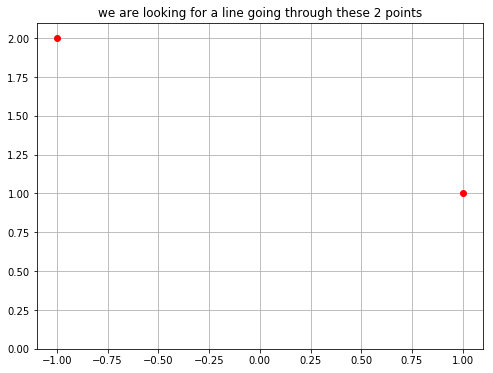

In [10]:
plt.figure(figsize=[8,6])
p=np.array([[-1,2],[1,1]])
plt.plot(p[:,0],p[:,1],'ro')
plt.xlim([-1.1,1.1])
plt.ylim([0,2.1])
plt.grid()
plt.title('we are looking for a line going through these 2 points');
plt.show()

Any line (other than vertical) can be expressed as $y=w_0+w_1x$ where $[x,y]$ are points along the line $w_0$ y-axis intercept and $w_1$ is the slope. <br>


To identify the line that passes through the two points we need to find $w_0,w_1$ that satisfy two constraints:

* The point $[x,y]=[-1,2]$ implies the constraint $w_0-w_1=2$
* The point $[x,y]=[1,1]$ implies the constraint $w_0+w_1=1$



We can write the two equations in matrix form as follows:
$$
\begin{equation}
\begin{bmatrix} 1 & -1 \\
	   1 & 1	
\end{bmatrix}
\begin{bmatrix} w_0 \\ w_1	
\end{bmatrix}
=
\begin{bmatrix} 2 \\ 1	
\end{bmatrix}
\end{equation}
$$
Which we can write succinctly as ${\bf A w = b}$

* The coefficients matrix ${\bf A} = \begin{equation}
\begin{bmatrix} 1 & -1 \\
	   1 & 1	
\end{bmatrix}
\end{equation} $
* The *ordinate* or *dependent variable* vector: ${\bf b}=\begin{bmatrix} 2 \\ 1	\end{bmatrix}$
* The parameter vector ${\bf w} = \begin{bmatrix} w_0 \\ w_1	\end{bmatrix}$

**Goal:** Find ${\bf w}$ such that  ${\bf A w = b}$

As ${\bf A}$ is invertible we can multiply both sides by ${\bf A^{-1}}$ and get:

${\bf w =  A^{-1} A w = A^{-1} b }$


In [11]:
def F(x,w):
    return w[0]+w[1]*x

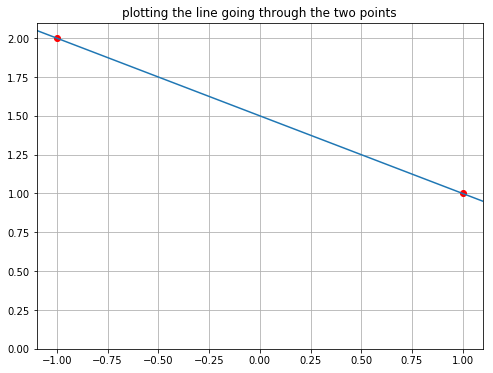

In [15]:
from numpy.linalg import solve

A = np.array([[1,-1], [1,1]])
b = np.array([[2],[1]])
w = solve(A, b)


plt.figure(figsize=[8,6])
plt.plot(p[:,0],p[:,1],'ro')
_xlim=[-1.1,1.1]
plt.xlim(_xlim)
plt.ylim([0,2.1])
plt.plot(_xlim,[F(_xlim[0],w),F(_xlim[1],w)])
plt.grid()
plt.title('plotting the line going through the two points')
plt.show()

##### The exponential grows much faster than the polynomials

In [18]:
def f(x_max):
    x = np.arange(0, x_max, 0.01)
    plt.plot(x, x, 'b', linewidth = 3, label = '$x$')
    plt.plot(x, x**2, 'r', linewidth = 3, label = '$x^2$')
    plt.plot(x, 2**x, 'm', linewidth = 3, label = '$2^x$')
    plt.xlabel('x', fontsize = 20)
    plt.xticks(fontsize = 18)
    plt.yticks(np.linspace(max(2**x_max, x_max**2)/10, max(2**x_max, x_max**2), 10), fontsize = 18)
    plt.gca().set_xlim([0, x_max])
    plt.gca().set_ylim([0, max(2**x_max, x_max**2)])
    plt.gcf().set_size_inches(20, 10)
    plt.legend(fontsize = 20)
    plt.show()
    
widgets.interact(f, x_max=widgets.FloatSlider(min = 0.5, max = 20, step = 0.5))

A Jupyter Widget

<function __main__.f>

### Useful functions

[itertools](https://docs.python.org/2/library/itertools.html) --> product() , permutations(), combinations() , combinations_with_replacement(), ...  


[scipy.special](https://docs.scipy.org/doc/scipy-1.0.0/reference/special.html)  --> comb, perm, binom, .... 

join, zip, all(), any(), [numpy.random.randint](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html#numpy-random-randint)